## __Language Similarity Predictor__
### __Abstract:__
* Made by: __Payton Lin__ (pal109@pitt.edu)
* __Research Question:__ *How difficult is it to learn a language based on previous language experience?*
  * As a linguistics minor interested in language acquisition I would like to know how similar languages are to each other and if they could be learned simultaneously.
* __Why?__
  * Lanuage learning is difficult and there is a lot of variance in the previous knowledge a language learner may have. 
  * Predicting this could help language learners and researchers save time and make decisions based on the estimate.
* __For who?__
  * Linguistic researchers and language learners
### __Methods:__
* Cosine Similarity
* Binary Classification
* RandomForest Classificatino
* Logistic Regression
### __Data:__
* Gathered from https://asjp.clld.org/languages
  * Wichmann, Søren, Eric W. Holman, and Cecil H. Brown (eds.). 2022. The ASJP Database (version 20).
* Converted from JSON files into CSV files through online converter (https://www.convertcsv.com/json-to-csv.htm)
### __ASJP Codebook:__
    |  ASJP |                             Phonetic Description                               |         IPA         |
    |-------|--------------------------------------------------------------------------------|---------------------|
    |   i   |                   high front vowel, rounded and unrounded                      |    (i, ɪ, y, ʏ)     |
    |   e   |                   mid front vowel, rounded and unrounded                       |       (e, ø)        |
    |   E   |                   low front vowel, rounded and unrounded                       | (a, æ, ɛ, ɶ, œ, e)  |
    |   3   |                high and mid central vowel, rounded and unrounded               |(ɨ, ɘ, ə, ɜ, ʉ, ɵ, ɞ)|
    |   a   |                       low central vowel, unrounded                             |        (ɐ, ä)       |
    |   u   |                   high back vowel, rounded and unrounded                       |      (ɯ, u, ʊ)      |
    |   o   |               mid and low back vowel, rounded and unrounded                    |  (ɤ, ʌ, ɑ, o, ɔ, ɒ) |
    |   p   |                   voiceless bilabial stop and fricative                        |         (p, ɸ)      |
    |   b   |                      voiced bilabial stop and fricative                        |         (b, β)      |
    |   m   |                                bilabial nasal                                  |           (m)       |
    |   f   |                       voiceless labiodental fricative                          |           (f)       |
    |   v   |                       voiced labiodental fricative                             |           (v)       |
    |   8   |                     voiceless and voiced dental fricative                      |          (θ, ð)     |
    |   4   |                                 dental nasal                                   |           (n̪)       |
    |   t   |                           voiceless alveolar stop                              |           (t)       |
    |   d   |                           voiced alveolar stop                                 |           (d)       |
    |   s   |                       voiceless alveolar fricative                             |           (s)       |
    |   z   |                          voiced alveolar fricative                             |           (z)       |
    |   c   |                     voiceless and voiced alveolar affricate                    |         (t͡s, d͡z)    |
    |   n   |                       voiceless and voiced alveolar nasal                      |           (n)       |
    |   S   |                       voiceless postalveolar fricative                         |           (ʃ)       |
    |   Z   |                          voiced postalveolar fricative                         |           (ʒ)       |
    |   C   |                       voiceless palato-alveolar affricate                      |           (t͡ʃ)      |
    |   j   |                           voiced palato-alveolar affricate                     |           (d͡ʒ)      |
    |   T   |                       voiceless and voiced palatal stop                        |          (c, ɟ)     |
    |   5   |                                 palatal nasal                                  |           (ɲ)       |
    |   k   |                               voiceless velar stop                             |           (k)       |
    |   g   |                               voiced velar stop                                |           (ɡ)       |
    |   x   |                       voiceless and voiced velar fricative                     |          (x, ɣ)     |
    |   N   |                                   velar nasal                                  |           (ŋ)       |
    |   q   |                               voiceless uvular stop                            |           (q)       |
    |   G   |                               voiced uvular stop                               |           (ɢ)       |
    |   X   |voiceless and voiced uvular fricative, voiceless and voiced pharyngeal fricative|      (χ, ʁ, ħ, ʕ)   |
    |   7   |                             voiceless glottal stop                             |           (ʔ)       |
    |   h   |                      voiceless and voiced glottal fricative                    |          (h, ɦ)     |
    |   l   |                         voiced alveolar lateral approximate                    |           (l)       |
    |   L   |                               all other laterals                               |        (ʟ, ɭ, ʎ)    |
    |   w   |                       voiced bilabial-velar approximant                        |           (w)       |
    |   y   |                               palatal approximant                              |           (j)       |
    |   r   |          voiced apico-alveolar trill and all varieties of “r-sounds”           |       (r, ʀ, etc.)  |
    |   !   |                          all varieties of “click-sounds”                       |       (ǃ, ǀ, ǁ, ǂ)  |
### __Goal:__
* Compare language similarity through word pronounciation simliarity
* Help predict difficulty of language learning from original language(s)

In [1342]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from functools import reduce
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [1343]:
# Loads CSVs
dfenglish = pd.read_csv('ENGLISH.csv')
dfspanish = pd.read_csv('SPANISH.csv')
dfgerman = pd.read_csv('GERMAN.csv')
dffrench = pd.read_csv('FRENCH.csv')
dfmandarin = pd.read_csv('MANDARIN.csv')
dfjapanese = pd.read_csv('JAPANESE.csv')

### __Data Cleaning__
* Missing values: 
  * All columns removed contained *NaN* values or unecessary data.
  * The only column that contained *NaN* values that was kept was 'ethnologue_family' and all values were filled to be the same as the first row because the ethnologue family of words within the same language is the same.
* Outliers:
  * There were no outliers because the data columns are meant to be either wholly unique or wholly identical.
* Distributions:
  * Distributions were not transformed because it would not improve the interpretability of the data as they seemed clear enough already.
* Scale:
  * Overlap vector was scaled with MinMaxScaler() because the data had very different number ranges but I wanted to preserve the relationships between the data points while keeping everything in a range of [0,1] to allow for the similarity score calculation to remain a percentage.
* Transformation:
  * No transformation was necessary because histogram shows a normal distribution.

In [1344]:
# Removes unnecessary columns
dfenglish = dfenglish.drop(columns=['pk','wordlist_pk','code_wals','code_iso','code_glottolog','classification_wals','classification_ethnologue','classification_glottolog','number_of_speakers','recently_extinct','long_extinct','year_of_extinction','wals_genus','wals_family','glottolog_family','id.1','description','loan','markup_description','latitude','longitude'])
dfspanish = dfspanish.drop(columns=['pk','wordlist_pk','code_wals','code_iso','code_glottolog','classification_wals','classification_ethnologue','classification_glottolog','number_of_speakers','recently_extinct','long_extinct','year_of_extinction','wals_genus','wals_family','glottolog_family','id.1','description','loan','markup_description','latitude','longitude'])
dfgerman = dfgerman.drop(columns=['pk','wordlist_pk','code_wals','code_iso','code_glottolog','classification_wals','classification_ethnologue','classification_glottolog','number_of_speakers','recently_extinct','long_extinct','year_of_extinction','wals_genus','wals_family','glottolog_family','id.1','description','loan','markup_description','latitude','longitude'])
dffrench = dffrench.drop(columns=['pk','wordlist_pk','code_wals','code_iso','code_glottolog','classification_wals','classification_ethnologue','classification_glottolog','number_of_speakers','recently_extinct','long_extinct','year_of_extinction','wals_genus','wals_family','glottolog_family','id.1','description','loan','markup_description','latitude','longitude'])
dfmandarin = dfmandarin.drop(columns=['pk','wordlist_pk','code_wals','code_iso','code_glottolog','classification_wals','classification_ethnologue','classification_glottolog','number_of_speakers','recently_extinct','long_extinct','year_of_extinction','wals_genus','wals_family','glottolog_family','id.1','description','loan','markup_description','latitude','longitude'])
dfjapanese = dfjapanese.drop(columns=['pk','wordlist_pk','code_wals','code_iso','code_glottolog','classification_wals','classification_ethnologue','classification_glottolog','number_of_speakers','recently_extinct','long_extinct','year_of_extinction','wals_genus','wals_family','glottolog_family','id.1','description','loan','markup_description','latitude','longitude'])

In [1345]:
# Adds values for all rows in 'ethnologue_family'
def addEthnoFam(df):
   df['ethnologue_family'] = df['ethnologue_family'].iloc[0]
addEthnoFam(dfenglish)
addEthnoFam(dfspanish)
addEthnoFam(dfgerman)
addEthnoFam(dffrench)
addEthnoFam(dfmandarin)
addEthnoFam(dfjapanese)

In [1346]:
# Fills NaN values in 'name' with correct name
dfenglish['name'] = dfenglish['name'].fillna('English')
dfspanish['name'] = dfspanish['name'].fillna('Spanish')
dfgerman['name'] = 'German' # Name is different in CSV so have to change first row as well
dffrench['name'] = dffrench['name'].fillna('French')
dfmandarin['name'] = dfmandarin['name'].fillna('Mandarin')
dfjapanese['name'] = dfjapanese['name'].fillna('Japanese')

In [1347]:
# Changes column name to be more inline with data
def renameCol(df, old, new):
    df.rename(columns = {old:new}, inplace=True)
renameCol(dfenglish, 'word', 'pronunciation')
renameCol(dfspanish, 'word', 'pronunciation')
renameCol(dfgerman, 'word', 'pronunciation')
renameCol(dffrench, 'word', 'pronunciation')
renameCol(dfmandarin, 'word', 'pronunciation')
renameCol(dfjapanese, 'word', 'pronunciation')

In [1348]:
# Splits 'id' columns into id number and word
def splitID(df):
    df[['id','word']]=df['id'].str.split(' ', expand=True)
splitID(dfenglish) 
splitID(dfspanish) 
splitID(dfgerman) 
splitID(dffrench) 
splitID(dfmandarin) 
splitID(dfjapanese) 

In [1349]:
# Reorders column
dfenglish = dfenglish[['id','word','pronunciation','ethnologue_family','name']]
dfspanish = dfspanish[['id','word','pronunciation','ethnologue_family','name']]
dfgerman = dfgerman[['id','word','pronunciation','ethnologue_family','name']]
dffrench = dffrench[['id','word','pronunciation','ethnologue_family','name']]
dfmandarin = dfmandarin[['id','word','pronunciation','ethnologue_family','name']]
dfjapanese = dfjapanese[['id','word','pronunciation','ethnologue_family','name']]

In [1350]:
# Removes ' //' from 'pronunciation' column
dfenglish['pronunciation'] = dfenglish['pronunciation'].str.replace(' //','')
dfspanish['pronunciation'] = dfspanish['pronunciation'].str.replace(' //','')
dfgerman['pronunciation'] = dfgerman['pronunciation'].str.replace(' //','')
dffrench['pronunciation'] = dffrench['pronunciation'].str.replace(' //','')
dfmandarin['pronunciation'] = dfmandarin['pronunciation'].str.replace(' //','')
dfjapanese['pronunciation'] = dfjapanese['pronunciation'].str.replace(' //','')

In [1351]:
# Explodes the multiple pronunciations into seperate rows
dfjapanese = dfjapanese.assign(pronunciation=dfjapanese['pronunciation'].str.split(', ')).explode('pronunciation')

In [1352]:
# Finds phonemes in 'pronunciation' column
ASJPphonemes = {'i', 'e', 'E', '3', 'a', 'u', 'o', 'p', 'b', 'm', 'f', 'v', '8', '4', 't', 'd', 's', 'z', 'c', 'n', 'S', 'Z', 'C', 'j', 'T', '5', 'k', 'g', 'N', 'q', 'G', 'X', '7', 'h', 'l', 'L', 'w', 'y', 'r','!'}
english = {}
spanish = {}
german = {}
french = {}
mandarin = {}
japanese = {}
def findWordPhoneme(df, vowels, list):
    for p in df:
        for l in vowels:
            key = l
            if(l in p):
                if l not in list:
                    list[l] = 0
                list[l] += 1
                
findWordPhoneme(dfenglish['pronunciation'], ASJPphonemes, english)
findWordPhoneme(dfspanish['pronunciation'], ASJPphonemes, spanish)
findWordPhoneme(dfgerman['pronunciation'], ASJPphonemes, german)
findWordPhoneme(dffrench['pronunciation'], ASJPphonemes, french)
findWordPhoneme(dfmandarin['pronunciation'], ASJPphonemes, mandarin)
findWordPhoneme(dfjapanese['pronunciation'], ASJPphonemes, japanese)

In [1353]:
# Switches dictionaries to dataframes and melts and renames columns
eplist = pd.DataFrame(english, index = [0])
splist = pd.DataFrame(spanish, index = [0])
gplist = pd.DataFrame(german, index = [0])
fplist = pd.DataFrame(french, index = [0])
mplist = pd.DataFrame(mandarin, index = [0])
jplist = pd.DataFrame(japanese, index = [0])
eplist = pd.melt(eplist)
splist = pd.melt(splist)
gplist = pd.melt(gplist)
fplist = pd.melt(fplist)
mplist = pd.melt(mplist)
jplist = pd.melt(jplist)

renameCol(eplist,'variable','phoneme')
renameCol(eplist,'value','num_occurences_eng')
renameCol(splist,'variable','phoneme')
renameCol(splist,'value','num_occurences_es')
renameCol(gplist,'variable','phoneme')
renameCol(gplist,'value','num_occurences_ger')
renameCol(fplist,'variable','phoneme')
renameCol(fplist,'value','num_occurences_fr')
renameCol(mplist,'variable','phoneme')
renameCol(mplist,'value','num_occurences_cn')
renameCol(jplist,'variable','phoneme')
renameCol(jplist,'value','num_occurences_jp')

### __Data Analysis__

In [1354]:
# Creates a superlist of all language phoneme lists
dflist = [eplist,splist,gplist,fplist,mplist,jplist]
superlist = reduce(lambda  left,right: pd.merge(left,right,on=['phoneme'],how='outer'), dflist)
superlist.fillna(0, inplace=True)

In [1355]:
# Transposes superlist to put languages in rows and creates dataframe with every possible language pair.
phoneme_vectors = superlist.set_index('phoneme')[['num_occurences_eng','num_occurences_es','num_occurences_ger','num_occurences_fr','num_occurences_cn','num_occurences_jp']].T
phoneme_vectors.index = ['English', 'Spanish', 'German', 'French', 'Mandarin', 'Japanese']

languages = phoneme_vectors.index.tolist()
lang_pairs = list(combinations(languages, 2))
dfpairs = pd.DataFrame(lang_pairs, columns=['lang1', 'lang2'])

In [1356]:
# Computes phoneme similarity by creating vectors of phoneme occurrences per language and calculating with cosine simiarity equation.
def get_vec(lang):
    return phoneme_vectors.loc[lang].values.reshape(1, -1)

def cosine_sim(l1, l2):
    return cosine_similarity(get_vec(l1), get_vec(l2))[0][0]

dfpairs['phoneme_sim'] = dfpairs.apply(lambda row: cosine_sim(row['lang1'], row['lang2']), axis=1)

In [1357]:
# Computes overlap for phonemes by finding the absolute difference of each vector
phoneme_sums = phoneme_vectors.sum(axis=1)
overlap_matrix = phoneme_sums.values.reshape(-1, 1) - phoneme_sums.values
overlap_matrix = pd.DataFrame(overlap_matrix, index=phoneme_sums.index, columns=phoneme_sums.index)

In [1358]:
# Flattens and normalizes overlap matrix into a vector and scales 'phoneme_sim' for calculations later
scaler = MinMaxScaler()

overlap_vector = np.triu(overlap_matrix, k=1).flatten()
overlap_vector = overlap_vector[overlap_vector != 0]
overlap_vector_normalized = scaler.fit_transform(overlap_vector.reshape(-1, 1))
dfovn = pd.DataFrame(overlap_vector_normalized, columns=['phoneme_overlap'])

dfpairs[['phoneme_sim']] = scaler.fit_transform(dfpairs[['phoneme_sim']])

In [1359]:
# Creates a super matrix that contains every dataframe
dfsuper = pd.concat([dfenglish, dfspanish, dfgerman, dffrench, dfmandarin, dfjapanese])

In [1360]:
# Checks if the ethnologue family of compared languages are the same and assigns a binary output (1 = yes, 0 = no) respectively
langtofam = dfsuper.drop_duplicates('name').set_index('name')['ethnologue_family'].to_dict()

def same_family(l1, l2):
    return int(langtofam.get(l1) == langtofam.get(l2))

dfpairs['same_family'] = dfpairs.apply(lambda row: same_family(row['lang1'], row['lang2']), axis=1)
dfpairs = pd.concat([dfpairs,dfovn], axis=1)

In [1361]:
# Creates similarity based on arbitrary formula for model to use as target
def calculate_similarity(df):
    for row in df.itertuples(index=True):
        df['similarity_score'] = 0.4*df['phoneme_sim'] + 0.4*df['phoneme_overlap'] + 0.2*df['same_family']

calculate_similarity(dfpairs)

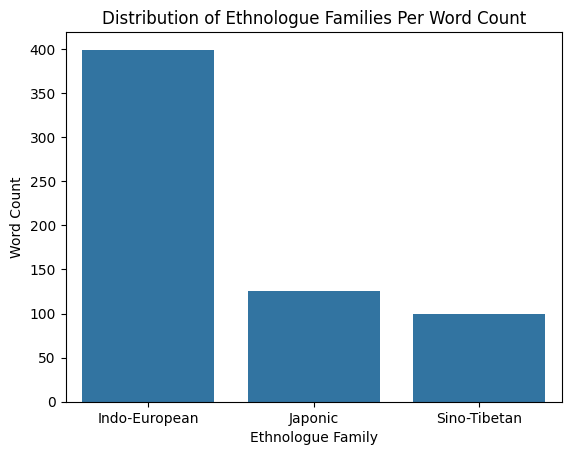

In [1362]:
# Bar graph distribution
g1 = sns.barplot(data=dfsuper['ethnologue_family'].value_counts())
g1.set(ylabel='Word Count',xlabel='Ethnologue Family', title='Distribution of Ethnologue Families Per Word Count')
plt.show()

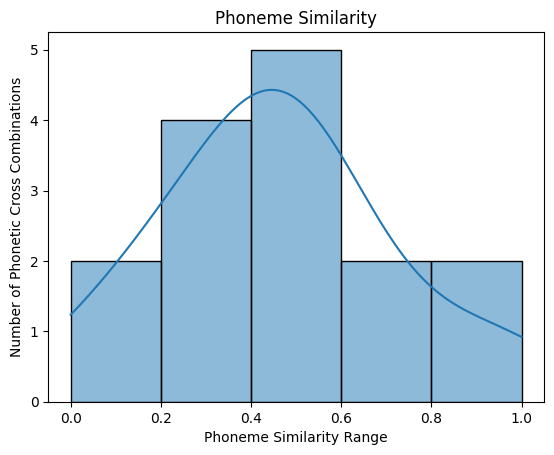

In [1363]:
# Histogram of cross combinations and phoneme similarity data
g2 = sns.histplot(data=dfpairs['phoneme_sim'], kde=True)
g2.set(ylabel='Number of Phonetic Cross Combinations',xlabel='Phoneme Similarity Range', title='Phoneme Similarity')
plt.show()

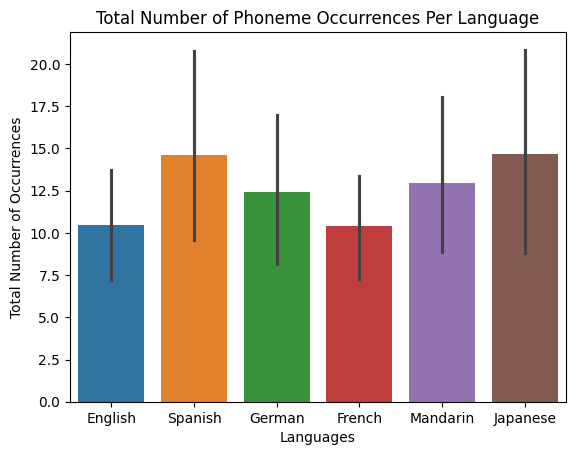

In [1364]:
# Barplot of total phoneme occurences in languages
g3 = sns.barplot(data=superlist.rename(columns={'num_occurences_eng':'English','num_occurences_es':'Spanish','num_occurences_ger':'German','num_occurences_fr':'French','num_occurences_cn':'Mandarin','num_occurences_jp':'Japanese'}))
g3.set(xlabel='Languages',ylabel='Total Number of Occurrences', title='Total Number of Phoneme Occurrences Per Language')
plt.show()

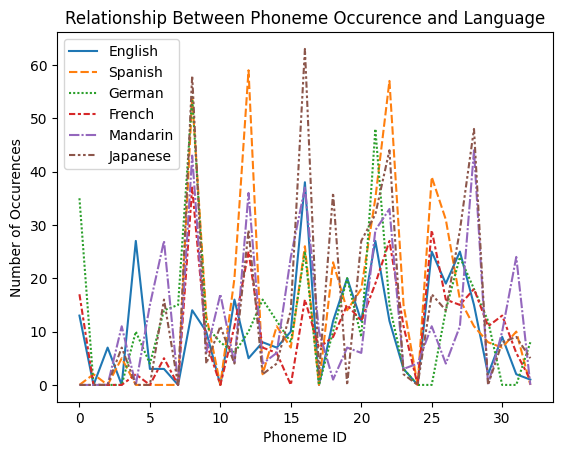

In [1365]:
# Relationship between phonemes and languages
g4 = sns.lineplot(data=superlist.rename(columns={'num_occurences_eng':'English','num_occurences_es':'Spanish','num_occurences_ger':'German','num_occurences_fr':'French','num_occurences_cn':'Mandarin','num_occurences_jp':'Japanese'}))
g4.set(xlabel='Phoneme ID',ylabel='Number of Occurences', title='Relationship Between Phoneme Occurence and Language')
plt.show()

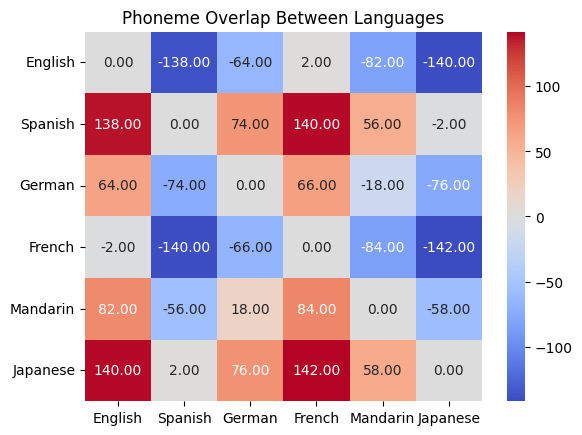

In [1366]:
# Heatmap of phoneme overlap
g5 = sns.heatmap(overlap_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
g5.figsize=(10, 8)
g5.set(title='Phoneme Overlap Between Languages')
plt.show()

### __Features__
* Features for analysis:
  1. Phonemes
       * Phonemes are sound features in languages that determine how speech is sounded so for simplicity we can think of languages having similar phonemes as having similar sounding methods.
  2. Language family
       * Language family is important to determine the origin of a language which contributes to its overall structure and ease of cross-language understanding.
  3. Similarity
       * The similarity is a number calculated through cosine similarity.
* Statistics
  * Phonemes
    * Min: 661
    * Max: 910
    * Std: 78.036
    * Sum: 11189
    * 25%: 683
    * Mean: 745.933
    * 75%: 773.5
  * Language family
    * Min: 0
    * Max: 2
    * Std: 0.756
    * Sum: 325
    * 25%: 0
    * Mean: 0.521
    * 75%: 1
  * Similarity
    * Min: 0.635
    * Max: 0.921
    * Std: 0.756
    * Sum: 11.495
    * 25%: 0.726
    * Mean: 0.766
    * 75%: 0.804
* Predictors:
  * Phoneme similarity, phonetic overlap, and language family
* Response:
  * Similarity score
    * Arbitrary calculation made from weighted multiplication and addition of all predictors (phonetic predictors were valued higher because they are more substantial than language family)
    * $S=0.4 * \alpha +0.4 * \beta +0.2 * \gamma$
      * $\alpha$ -> 'phoneme_sim'
      * $\beta$ -> 'phoneme_overlap'
      * $\gamma$ -> 'same_family'
    * I also classified the similarity scores based on whether they were above 0.6, normally the threshold is 0.85 but there is only one above 0.85 and it makes the model very inaccurate.
* Issues:
  * When I tested the threshold of binary classification for the RandomForest model its accuracy jumps from 0.5 to 1.0 indicating the model is likely guessing until the threshold reaches a certain point for some reason.

### __Models__
1. RandomForest

In [1367]:
# Binary classification of 'similarity_score' for model training
dfpairs['binary_similarity_score'] = np.where(dfpairs['similarity_score'] >= 0.6, 1,0)

In [1368]:
# Creates predictors and response variables
X = dfpairs[['same_family','phoneme_sim','phoneme_overlap']]
# X = dfpairs[['phoneme_sim','phoneme_sim']]
# X = dfpairs[['phoneme_sim','same_family']]
# X = dfpairs[['phoneme_overlap','same_family']]
y = dfpairs[['binary_similarity_score']].values.ravel()

In [1369]:
# Code from (https://github.com/dbabichenko/python_for_data_and_analytics/blob/master/Dimension%20Reduction/Random%20Forest%20Example%201.ipynb)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [1370]:
# Code from (https://github.com/dbabichenko/python_for_data_and_analytics/blob/master/Dimension%20Reduction/Random%20Forest%20Example%201.ipynb)
rfc = RandomForestClassifier(random_state=1, max_depth=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
feats = X.columns
importances = rfc.feature_importances_

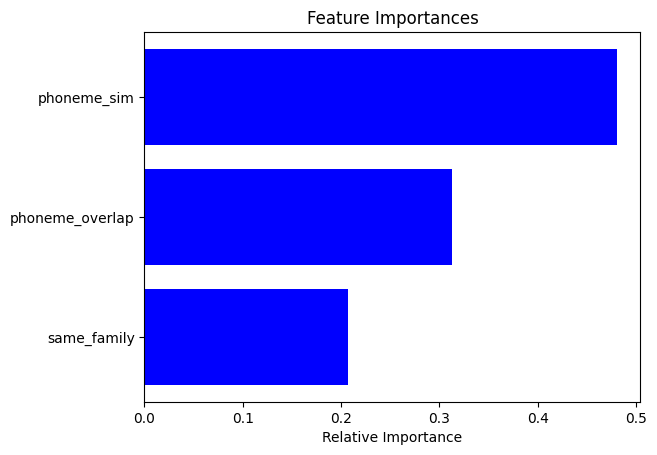

In [1371]:
# Code from (https://github.com/dbabichenko/python_for_data_and_analytics/blob/master/Dimension%20Reduction/Random%20Forest%20Example%201.ipynb)
indices = np.argsort(importances)[-3:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feats[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1372]:
# Code from (https://github.com/dbabichenko/python_for_data_and_analytics/blob/master/Dimension%20Reduction/Random%20Forest%20Example%201.ipynb)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred)))
print("ROC Accuracy: " + str(metrics.roc_auc_score(y_test, y_pred,)))

Accuracy: 1.0
ROC Accuracy: 1.0


2. Logistic Regression

In [1373]:
# Code from (https://github.com/dbabichenko/python_for_data_and_analytics/blob/master/Classification/05%20-%20Logistic%20Regression.ipynb)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [ ]:
# Code from (https://github.com/dbabichenko/python_for_data_and_analytics/blob/master/Classification/05%20-%20Logistic%20Regression.ipynb)
print("Accuracy: " + str(metrics.accuracy_score(y_test, predictions)))
print("ROC Accuracy: " + str(metrics.roc_auc_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions,))
print(classification_report(y_test,predictions,zero_division=0)) # Was throwing a weird error so I added the zero_division parameter

Accuracy: 0.6666666666666666
ROC Accuracy: 0.5
[[2 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

